In [1]:
import h5py
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# datacll = h5py.File('datacll.h5', 'r')
# datacll = h5py.File('datacllyear.h5', 'r')
# datacll = h5py.File('datacll17.552contribution11.h5', 'r')#251记录
# datacll = h5py.File('datacll16.961goods.h5', 'r')#251记录#快速和地面相同
# datacll = h5py.File('datacll17.257goods1.h5', 'r')#快速和地面相同
datacll = h5py.File('datacll16.997goods3.h5', 'r')#交通相关性的空间模式
# datacll = h5py.File('datacll17.326goods6.h5', 'r')
# datacll = h5py.File('newdatacll17.026goods6.h5', 'r')
# datacll = h5py.File('newdatacll17.064goods7.h5', 'r')
# datacll = h5py.File('newdatacll16.961goods.h5', 'r')#快速和地面相同

tra = datacll['tra']
w=datacll['w']
wea=datacll['wea']
sd=datacll['sd']
# tra=tra[o]
print(tra,w,wea,sd)

<HDF5 dataset "tra": shape (5946, 24, 16, 16, 3), type "<f4"> <HDF5 dataset "w": shape (5946, 24, 3), type "<f4"> <HDF5 dataset "wea": shape (5946, 24, 5), type "<f4"> <HDF5 dataset "sd": shape (5946, 24, 54), type "<f4">


In [76]:
discfile = '../data/data_wea_time_unify.csv'


data = pd.read_csv(discfile)

futrue_time=24

time_step=24


for i in range(24,96):
    data['PM25_m'+str(i)]=data['PM25_mean'].shift(-i)
data=data.dropna(how='any')

Index_data=data[['date', 'hour',  'week', 'season','PM25_1']]
Index_data['index_']=range(5969)
o=list(Index_data[Index_data.hour==0].index_)[:251]
o0=list(Index_data[(Index_data.hour==0) & (Index_data.season==0)].index_)
o1=list(Index_data[(Index_data.hour==0) & (Index_data.season==1)].index_)
o2=list(Index_data[(Index_data.hour==0) & (Index_data.season==2)].index_)
o3=list(Index_data[(Index_data.hour==0) & (Index_data.season==3)].index_)

owork=list(Index_data[(Index_data.hour==0) & (Index_data.week<6)].index_)
oweekend=list(Index_data[(Index_data.hour==0) & (Index_data.week>5)].index_)

o00=list(Index_data[Index_data.season==0].index_)
o11=list(Index_data[Index_data.season==1].index_)
o22=list(Index_data[Index_data.season==2].index_)
o33=list(Index_data[Index_data.season==3].index_)

oowork=list(Index_data[Index_data.week<6].index_)
ooweekend=list(Index_data[Index_data.week>5].index_)

In [584]:
np.mean(np.mean(w,axis=0),axis=0)

array([  0.39874518,  26.97814941,   5.15413904], dtype=float32)

In [585]:
np.mean(np.mean(wea,axis=0),axis=0)

array([-0.12129837,  0.62385917, -0.86560899, -0.34895122, -1.42216551], dtype=float32)

In [586]:
co=['PM25_1', 'PM25_2', 'PM25_3', 'PM25_4', 'PM25_5', 'PM25_6', 'PM25_7',
       'PM25_8', 'PM25_9', 'PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5',
       'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'SO2_1', 'SO2_2', 'SO2_3',
       'SO2_4', 'SO2_5', 'SO2_6', 'SO2_7', 'SO2_8', 'SO2_9', 'NO2_1', 'NO2_2',
       'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO2_8', 'NO2_9', 'O3_1',
       'O3_2', 'O3_3', 'O3_4', 'O3_5', 'O3_6', 'O3_7', 'O3_8', 'O3_9', 'CO_1',
       'CO_2', 'CO_3', 'CO_4', 'CO_5', 'CO_6', 'CO_7', 'CO_8', 'CO_9']

## 全年污染贡献值

In [85]:
poll=[]

In [86]:
poll.append(np.mean(np.mean(sd,axis=0),axis=0)[:9].mean())

In [8]:
poll.append(np.mean(np.mean(sd,axis=0),axis=0)[9:18].mean())

In [9]:
poll.append(np.mean(np.mean(sd,axis=0),axis=0)[18:27].mean())

In [10]:
poll.append(np.mean(np.mean(sd,axis=0),axis=0)[27:36].mean())

In [12]:
poll.append(np.mean(np.mean(sd,axis=0),axis=0)[36:45].mean())

In [13]:
poll.append(np.mean(np.mean(sd,axis=0),axis=0)[45:54].mean())

In [87]:
poll

[172.51683]

## 春天污染值

In [84]:
sd[:]

array([[[ -2.34413742e+02,  -2.57391510e+02,  -2.34686676e+02, ...,
          -2.54597504e+02,  -2.36006409e+02,  -2.60665161e+02],
        [ -1.70686996e+02,  -1.79385880e+02,  -1.69561707e+02, ...,
          -1.77360199e+02,  -1.71672012e+02,  -1.81437607e+02],
        [ -3.11253448e+02,  -1.63941818e+02,  -3.09250000e+02, ...,
          -1.65119003e+02,  -2.96578217e+02,  -1.68273788e+02],
        ..., 
        [ -5.19716064e+02,  -4.47896545e+02,  -5.18088257e+02, ...,
          -4.41031433e+02,  -5.10796021e+02,  -4.40895020e+02],
        [ -5.61784790e+02,  -6.37085815e+02,  -5.64896484e+02, ...,
          -6.29478027e+02,  -5.67145325e+02,  -6.22773804e+02],
        [ -5.99647705e+02,  -9.95917297e+02,  -6.10427612e+02, ...,
          -9.93629944e+02,  -6.25525024e+02,  -9.76816406e+02]],

       [[ -3.53058777e+02,  -2.87481720e+02,  -3.50538239e+02, ...,
          -2.83209167e+02,  -3.49756195e+02,  -2.93726288e+02],
        [ -3.55335266e+02,  -2.15249802e+02,  -3.53394806e+0

In [81]:
sd[o22[:900]]

array([[[ -2.21567047e+02,  -1.74311996e+02,  -2.15349625e+02, ...,
          -1.71552856e+02,  -2.14253281e+02,  -1.80628113e+02],
        [ -1.17562759e+02,  -1.44354584e+02,   1.33607147e+02, ...,
          -3.15534088e+02,   2.07576370e+02,  -2.47552048e+02],
        [ -2.15196716e+02,  -2.06259384e+02,  -2.06556152e+02, ...,
          -1.93178482e+02,  -2.02993515e+02,  -1.98991058e+02],
        ..., 
        [ -9.21543518e+02,  -8.07275330e+02,  -8.79418884e+02, ...,
          -7.58306335e+02,  -8.34412537e+02,  -7.84700867e+02],
        [ -9.75507129e+03,  -1.24504968e+03,  -9.31495801e+03, ...,
          -7.93119446e+02,  -8.36302539e+03,  -1.09227966e+03],
        [ -2.29356226e+03,  -1.87891394e+03,  -2.17500342e+03, ...,
          -1.73369934e+03,  -2.03545496e+03,  -1.81892175e+03]],

       [[ -1.03143799e+02,  -1.00181007e+02,   1.64584198e+02, ...,
          -3.63641174e+02,   2.75885376e+02,  -2.06985504e+02],
        [ -7.37062134e+02,  -2.54896133e+02,  -7.04982300e+0

In [213]:
# sd_spring=sd[4965:]
# sd_spring=sd[:1347]
# sd_spring=sd[1348:2691]
# sd_spring=sd[2692:4964]
sd_spring=sd

In [214]:
poll_spring=[]

In [215]:
poll_spring.append(np.mean(np.mean(sd_spring,axis=0),axis=0)[:9].mean())

In [216]:
poll_spring.append(np.mean(np.mean(sd_spring,axis=0),axis=0)[9:18].mean())

In [217]:
poll_spring.append(np.mean(np.mean(sd_spring,axis=0),axis=0)[18:27].mean())

In [218]:
poll_spring.append(np.mean(np.mean(sd_spring,axis=0),axis=0)[27:36].mean())

In [219]:
poll_spring.append(np.mean(np.mean(sd_spring,axis=0),axis=0)[36:45].mean())

In [220]:
poll_spring.append(np.mean(np.mean(sd_spring,axis=0),axis=0)[45:54].mean())

In [221]:
poll_spring

[172.51683, 64.98243, 103.43868, 109.38059, 65.59903, 80.467613]

In [178]:
poll_spring

[135.3703, -39.299259, 30.228933, 30.470055, -30.765293, -2.1116519]

In [169]:
poll_spring

[-259.20917, -129.42029, -179.15094, -164.32086, -127.70801, -156.53468]

In [160]:
poll_spring

[-123.01325, -187.88307, -175.88484, -151.24913, -189.17653, -186.32593]

In [222]:
poll=[172.51683, 64.98243, 103.43868, 109.38059, 65.59903, 80.467613,-123.01325, -187.88307, -175.88484, -151.24913, -189.17653, -186.32593, -259.20917, -129.42029, -179.15094, -164.32086, -127.70801, -156.53468,
     135.3703, -39.299259, 30.228933, 30.470055, -30.765293, -2.1116519,578.36664, 351.18527, 435.0466, 430.99402, 347.31302, 385.17004]

In [223]:
(poll-np.min(poll))/(np.max(poll)-np.min(poll))

array([ 0.51544707,  0.38705941,  0.43297317,  0.44006734,  0.38779558,
        0.40554751,  0.16260727,  0.08515778,  0.09948273,  0.12889584,
        0.08361349,  0.08701689,  0.        ,  0.15495777,  0.09558326,
        0.11328922,  0.1570021 ,  0.12258531,  0.47109702,  0.26255523,
        0.34556645,  0.34585434,  0.27274412,  0.30695433,  1.        ,
        0.72876321,  0.82888708,  0.82404862,  0.72414005,  0.76933837])

In [224]:
(64.98243-np.min(poll))/(np.max(poll)-np.min(poll))

0.38705941137435668

In [14]:
np.sum(np.mean(np.mean(tra,axis=0),axis=0).T[0])

3.1111891

In [15]:
np.sum(np.mean(np.mean(tra,axis=0),axis=0).T[1])

2.9592922

In [16]:
np.sum(np.mean(np.mean(tra,axis=0),axis=0).T[2])

3.268316

In [196]:
import h5py
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# datacll = h5py.File('datacll.h5', 'r')#251记录
# datacll = h5py.File('datacllyear.h5', 'r')
# datacll = h5py.File('datacll17.552contribution11.h5', 'r')#251记录
# datacll = h5py.File('datacll16.961goods.h5', 'r')#251记录#快速和地面相同
# datacll = h5py.File('datacll17.257goods1.h5', 'r')#快速和地面相同
# datacll = h5py.File('datacll16.997goods3.h5', 'r')#交通相关性的空间模式
# datacll = h5py.File('datacll17.326goods6.h5', 'r')#快速和地面相同
# datacll = h5py.File('newdatacll17.026goods6.h5', 'r')
# datacll = h5py.File('newdatacll17.064goods7.h5', 'r')
datacll = h5py.File('newdatacll16.961goods.h5', 'r')#快速和地面相同
# datacll = h5py.File('newdatacll17.193goods.h5', 'r')#快速和地面相同
# datacll = h5py.File('newdatacll17.257goods.h5', 'r')#快速和地面相同
# datacll = h5py.File('newdatacll17.35goods.h5', 'r')#快速和地面相同


tra = datacll['tra']
w=datacll['w']
wea=datacll['wea']
sd=datacll['sd']

print(tra,w,wea,sd)

<HDF5 dataset "tra": shape (5946, 24, 16, 16, 3), type "<f4"> <HDF5 dataset "w": shape (5946, 24, 3), type "<f4"> <HDF5 dataset "wea": shape (5946, 24, 5), type "<f4"> <HDF5 dataset "sd": shape (5946, 24, 54), type "<f4">


In [197]:
# tra=tra[o[:-1]]
# tra=tra[ooweekend[:1700]]
# tra=tra[oowork]
tra=tra[oweekend[:-1]]
# tra=tra[owork]

# tra=tra[o00[:900]]
# tra=tra[o11[:-1]]
# tra=tra[o22[:-1]]
# tra=tra[o33[:-1]]
# tra=tra[o0[:-1]]
# tra=tra[o1[:-1]]
# tra=tra[o2[:-1]]
# tra=tra[o3[:-1]]

tra=(np.array(tra).swapaxes(3,4))
tra=(np.array(tra).swapaxes(2,3))

# tra1=np.mean(tra[owork],axis=0)
tra1=np.mean(tra,axis=0)
tra2=tra1.swapaxes(0,1)

ezs=tra2[0]
gzs=tra2[2]

g=[]
for i in range(24):
#     g.append(np.mean(gzs[i]))
    g.append((pd.DataFrame(gzs[i])).sem()[0])
e=[]
for i in range(24):
    e.append(np.mean(ezs[i]))
    
gg=(g-np.min(g))/(np.max(g)-np.min(g))
ee=(e-np.min(e))/(np.max(e)-np.min(e))

g1=(g)/np.max(np.abs(g))
e1=(e)/np.max(np.abs(e))

In [192]:
newe0=e
newg0=g

In [195]:
newe1=e
newg1=g

In [198]:
newg2=g
newe2=e

In [199]:
newg3=g
newe3=e

In [200]:
newg=[newg0,newg1,newg2,newg3]
newe=[newe0,newe1,newe2,newe3]

In [201]:
newgg0=(newg[0]-np.min(newg))/(np.max(newg)-np.min(newg))
newee0=(newe[0]-np.min(newe))/(np.max(newe)-np.min(newe))

In [202]:
newgg1=(newg[1]-np.min(newg))/(np.max(newg)-np.min(newg))
newee1=(newe[1]-np.min(newe))/(np.max(newe)-np.min(newe))

In [203]:
newgg2=(newg[2]-np.min(newg))/(np.max(newg)-np.min(newg))
newee2=(newe[2]-np.min(newe))/(np.max(newe)-np.min(newe))

In [186]:
newgg3=(newg[3]-np.min(newg))/(np.max(newg)-np.min(newg))
newee3=(newe[3]-np.min(newe))/(np.max(newe)-np.min(newe))

In [205]:
newgg2

array([  0.00000000e+00,   3.33892131e-05,   3.27399932e-04,
         3.54190590e-04,   4.35982947e-04,   5.04850395e-05,
         1.13013029e-01,   7.23179758e-01,   6.21395744e-03,
         2.20893952e-03,   7.11058616e-04,   6.76138879e-05,
         1.98658934e-04,   6.67573360e-04,   3.53452080e-04,
         8.20033951e-04,   6.32525247e-04,   2.15224409e-03,
         5.23648504e-03,   1.12191793e-02,   9.33161750e-03,
         2.82150460e-03,   1.26917288e-03,   8.57919877e-05], dtype=float32)

In [188]:
newgg0

array([ 0.06963471,  0.07136395,  0.09412584,  0.09692161,  0.36335963,
        0.08187782,  0.09439644,  0.17023645,  1.        ,  0.13039103,
        0.07167327,  0.070939  ,  0.07426543,  0.05559234,  0.04984205,
        0.0410682 ,  0.08429515,  0.13307597,  0.18252364,  0.0681407 ,
        0.06250607,  0.07501029,  0.07171362,  0.0724541 ], dtype=float32)

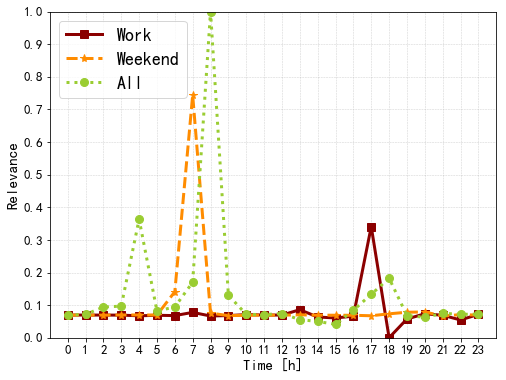

In [189]:
# -*- coding: utf-8 -*-
'''
@author: chenry
# E2.eps
# exp2
'''
import os
import os.path
import numpy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as mf
import sys
if __name__ == '__main__':
    miu = newgg0
    work_miu=newgg1
    weekendday_miu=newgg2
#      miu = [ 0.09344919,  0.09348173,  0.09330777,  0.09336609,  0.09143731,
#         0.09280618,  0.11962935,  0.36239427,  0.09294083,  0.09136457,
#         0.09448461,  0.09352438,  0.09331369,  0.10953544,  0.08760582,
#         0.08466105,  0.08999407,  0.35377049,  0.02802631,  0.08518189,
#         0.1009826 ,  0.09168388,  0.07958551,  0.09534284]
#     work_miu=[ 0.09344741,  0.09350858,  0.09339973,  0.09317937,  0.09043253,
#         0.09250604,  0.09130256,  0.1044248 ,  0.08956358,  0.09142741,
#         0.09531932,  0.0936128 ,  0.09341593,  0.11554618,  0.08548725,
#         0.08144788,  0.08898582,  0.4581753 ,  0.        ,  0.07720274,
#         0.0988128 ,  0.09259891,  0.07335556,  0.09611826]
#     weekendday_miu=[ 0.09345378,  0.09341468,  0.0930812 ,  0.09383176,  0.09396333,
#         0.09356162,  0.18968928,  1.        ,  0.1013483 ,  0.09123658,
#         0.09239364,  0.09330403,  0.09306083,  0.09436986,  0.09295963,
#         0.09278128,  0.09254958,  0.09059294,  0.09861512,  0.10513382,
#         0.10627148,  0.08943179,  0.09526137,  0.09339146]
    #
    labels = ['spring', 'summer', 'autumn', 'winter']
    colors = ['navy', 'darkorange', 'yellowgreen', 'darkred']
    markers = ['*', 'D', 's', 'o']
    linestyles = ['dashed', '--', '-', ':']
    x = range(24)
    fig, ax = plt.subplots(figsize=(8, 6))
    lines = []
    l, e, b = ax.errorbar(x, work_miu, marker=markers[2],label=u'Work', markersize=8, color=colors[3],  ls=linestyles[2], linewidth = 3)
    le, ee, be = ax.errorbar(x, weekendday_miu, marker=markers[0],label=u'Weekend', markersize=8, color=colors[1], ls=linestyles[0], linewidth=3)
    lle, lee, lbe = ax.errorbar(x, miu, marker=markers[3],label=u'All', markersize=8, color=colors[2], ls=linestyles[3], linewidth=3)
    fontsize = 15
    plt.legend(loc='upper left',prop={'size': 18})  # 让图例生效
    plt.xticks(range(0,24), weight='bold', fontsize = 13)
    ax.set_xlim(-1, 24)
    plt.yticks(np.arange(0, 1.1, 0.1), weight='bold', fontsize = 13)
    ax.set_ylim(0, 1)
    pr = mf.FontProperties(weight='bold', size=fontsize)
    ax.set_xlabel(u"Time [h]", fontsize=fontsize, weight='bold')
    ax.set_ylabel(u'Relevance', fontsize=fontsize, weight='bold')
    plt.grid(linestyle='--', linewidth=0.5, alpha=0.6)
    plt.show()



In [22]:
%matplotlib inline

ValueError: x and y must have same first dimension, but have shapes (24,) and (0,)

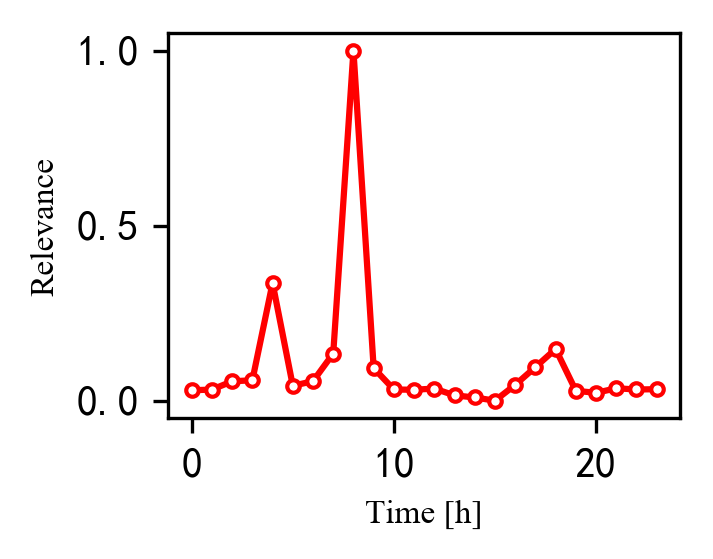

In [67]:
# encoding=utf-8
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager
x = range(24)

fig= plt.figure(num=None, figsize=(2.2, 1.7), dpi=300)
plt.xlabel(u"Time [h]", fontdict={'family' : 'Times New Roman', 'size':8}) #X轴标签
plt.ylabel("Relevance", fontdict={'family' : 'Times New Roman', 'size':8}) #Y轴标签
# axs0=plt.subplot(221)
plt.plot(x, gg, marker='o', mec='r',color='r',mfc='w',linewidth = 1.5, markersize=3)
plt.plot(x, ee, marker='o', mec='c',color='c',mfc='w',linewidth = 1.5, markersize=3)

# plt.rcParams['axes.facecolor']='r'
# plt.legend(prop={'size':6})  # 让图例生效
# , rotation=30
# rotation = 45,
plt.xticks(np.arange(0, 24, 1),fontsize=4, weight='bold')
plt.yticks(np.arange(-1, 1.1, 0.1),fontsize=4, weight='bold')
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
# plt.xlabel(u"Time [h]", fontdict={'family' : 'Times New Roman', 'size':8}) #X轴标签
# plt.ylabel("Relevance", fontdict={'family' : 'Times New Roman', 'size':8}) #Y轴标签
# plt.title("A simple plot") #标题

plt.grid( linestyle='--', linewidth=0.5,alpha=0.6)
# plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)



plt.show()


ValueError: x and y must have same first dimension, but have shapes (24,) and (0,)

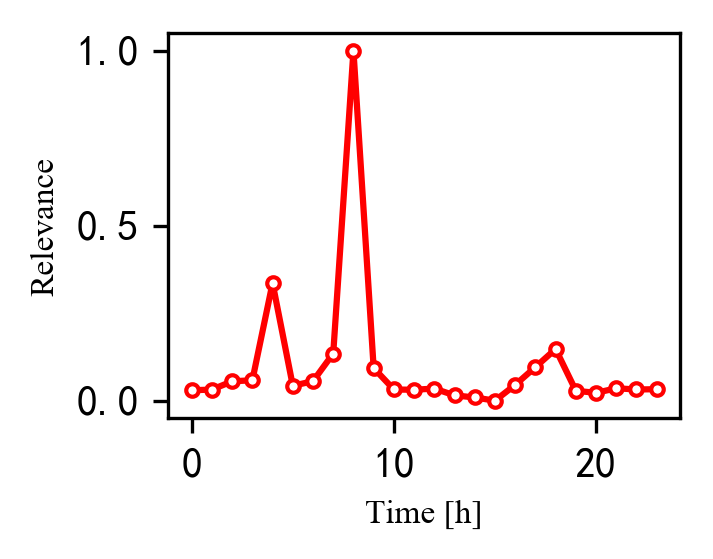

In [68]:
# encoding=utf-8
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager
x = range(24)

fig= plt.figure(num=None, figsize=(2.2, 1.7), dpi=300)
plt.xlabel(u"Time [h]", fontdict={'family' : 'Times New Roman', 'size':8}) #X轴标签
plt.ylabel("Relevance", fontdict={'family' : 'Times New Roman', 'size':8}) #Y轴标签
# axs0=plt.subplot(221)
plt.plot(x, gg, marker='o', mec='r',color='r',mfc='w',linewidth = 1.5, markersize=3)
plt.plot(x, ee, marker='o', mec='c',color='c',mfc='w',linewidth = 1.5, markersize=3)

# plt.rcParams['axes.facecolor']='r'
# plt.legend(prop={'size':6})  # 让图例生效
# , rotation=30
# rotation = 45,
plt.xticks(np.arange(0, 24, 1),fontsize=4, weight='bold')
plt.yticks(np.arange(-1, 1.1, 0.1),fontsize=4, weight='bold')
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
# plt.xlabel(u"Time [h]", fontdict={'family' : 'Times New Roman', 'size':8}) #X轴标签
# plt.ylabel("Relevance", fontdict={'family' : 'Times New Roman', 'size':8}) #Y轴标签
# plt.title("A simple plot") #标题

plt.grid( linestyle='--', linewidth=0.5,alpha=0.6)
# plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)



plt.show()


ValueError: x and y must have same first dimension, but have shapes (24,) and (0,)

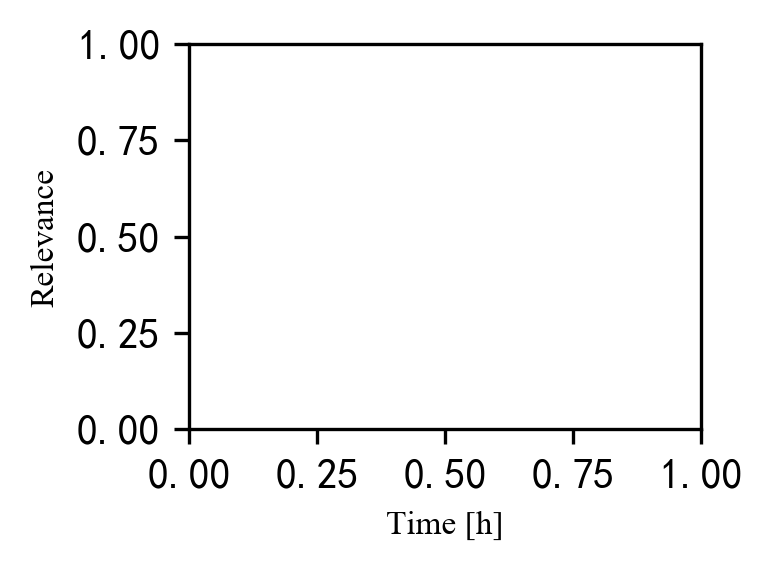

In [69]:
# encoding=utf-8
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager
x = range(24)

fig= plt.figure(num=None, figsize=(2.2, 1.7), dpi=300)
plt.xlabel(u"Time [h]", fontdict={'family' : 'Times New Roman', 'size':8}) #X轴标签
plt.ylabel("Relevance", fontdict={'family' : 'Times New Roman', 'size':8}) #Y轴标签
# axs0=plt.subplot(221)
plt.plot(x, ee, marker='o', mec='r',color='c',mfc='w',label=u'spring',linewidth = 1.5, markersize=3)
# plt.rcParams['axes.facecolor']='r'
plt.legend()  # 让图例生效
# , rotation=30
# rotation = 45,
plt.xticks(np.arange(0, 24, 1),fontsize=4, weight='bold')
plt.yticks(np.arange(-1, 1.1, 0.1),fontsize=4, weight='bold')
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
# plt.xlabel(u"Time [h]", fontdict={'family' : 'Times New Roman', 'size':8}) #X轴标签
# plt.ylabel("Relevance", fontdict={'family' : 'Times New Roman', 'size':8}) #Y轴标签
# plt.title("A simple plot") #标题

plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)


plt.show()


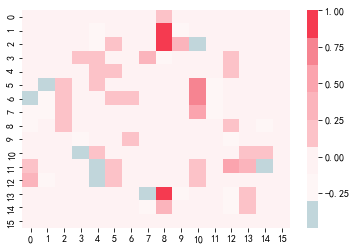

In [727]:
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import seaborn as sns
# data = pd.read_csv("../input/car_crashes.csv")
# data = data.corr()
# cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
# cmap = sns.hls_palette(8 , h=0.01, s=0.9, l=0.65)
# cmap = sns.choose_cubehelix_palette()
# cmap = sns.color_palette("Reds")
# cmap  = sns.color_palette("coolwarm", 10)
# cmap= sns.dark_palette("green", as_cmap=True)
# cmap  =  sns.diverging_palette(220,10, sep=80, n=9)
# cmap  =    sns.cubehelix_palette(8)
# cmap=ListedColormap(['#339933','#ccff99','#ffcc66','#ffccff','#cc33cc','#cc3366', '#cc3333'])
cmap=ListedColormap(['#c1d6db','#fef6f6','#fef2f3','#fcc2c8','#fbb4bc','#fba4ae','#f68491', '#f53a50'])
# cmap=ListedColormap(['#339933','#ccff99','#ffcc66','#ff9966','#ff6633','#ff3333','#ff0000','#cc0000', '#990000', '#660000'])


# cmap=ListedColormap(['#33cc00','#ccffcc','#ffff99','#ffcc66','#ff9966','#ff6633','#ff3333','#ff0000','#cc0000', '#990000', '#660000'])
# sns.heatmap((np.mean(gzs,axis=0)-np.min(gzs))/(np.max(gzs)-np.min(gzs)),cmap=cmap)
sns.heatmap((np.mean(gzs,axis=0))/np.max(np.abs(np.mean(gzs,axis=0))),cmap=cmap)

plt.show()


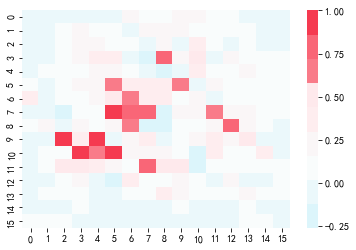

In [420]:
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import seaborn as sns
# data = pd.read_csv("../input/car_crashes.csv")
# data = data.corr()
# cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
# cmap = sns.hls_palette(8 , h=0.01, s=0.9, l=0.65)
# cmap = sns.choose_cubehelix_palette()
# cmap = sns.color_palette("Reds")
# cmap  = sns.color_palette("coolwarm", 10)
# cmap= sns.dark_palette("green", as_cmap=True)
# cmap  =  sns.diverging_palette(220,10, sep=80, n=9)
# cmap  =    sns.cubehelix_palette(8)
cmap=ListedColormap(['#dcf5fb','#ebf8fb','#f9fcfc','#faf6f7','#feedef','#fee9ec','#f97b89','#f96677', '#f53a50'])
# cmap=ListedColormap(['#82aab4','#c1d6db','#f3f3f3','#f8e4e6','#f8d7db','#f7c2c8','#f7a6b0','#f68491','#f56172'])
# cmap=ListedColormap(['#339933','#ccff99','#ffcc66','#ff9966','#ff6633','#ff3333','#ff0000','#cc0000', '#990000', '#660000'])


# cmap=ListedColormap(['#33cc00','#ccffcc','#ffff99','#ffcc66','#ff9966','#ff6633','#ff3333','#ff0000','#cc0000', '#990000', '#660000'])
# sns.heatmap((np.mean(ezs,axis=0)-np.min(ezs))/(np.max(ezs)-np.min(ezs)),cmap=cmap)
sns.heatmap((np.mean(ezs,axis=0))/np.max(np.abs(np.mean(ezs,axis=0))),cmap=cmap)
plt.show()


In [212]:
import random
for i in range(5):
    print('第',i,'组')
    print('红球:',end="")
    for i in range(6):
        print( random.randint(1,31),end=" ") 
    print('蓝球:',end="")    
    print(random.randint(1,16))

第 0 组
红球:19 8 24 19 20 31 蓝球:9
第 1 组
红球:8 28 18 22 1 31 蓝球:4
第 2 组
红球:21 1 12 2 28 13 蓝球:6
第 3 组
红球:24 3 29 28 3 15 蓝球:3
第 4 组
红球:17 23 4 12 11 9 蓝球:16
